In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv(r"C:\Users\svire\Downloads\ToyotaCorolla.csv", encoding='latin-1')

In [4]:
df.head(3)

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  

[3 rows x 38 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [11]:
df1=df.loc[:,("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
df1.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


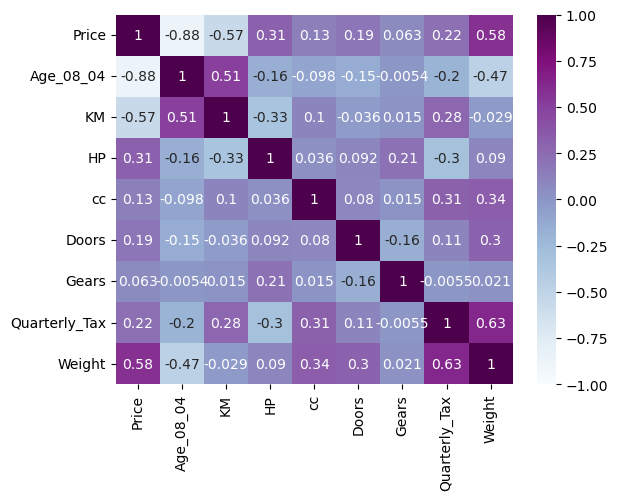

In [13]:
sns.heatmap(df1.corr(),vmin = -1,vmax = 1,annot = True,cmap = 'BuPu')
plt.show()

In [14]:
x = df1.drop(['Price'],axis = 1)
y = df1['Price']
print(x,y)

      Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0            23  46986   90  2000      3      5            210    1165
1            23  72937   90  2000      3      5            210    1165
2            24  41711   90  2000      3      5            210    1165
3            26  48000   90  2000      3      5            210    1165
4            30  38500   90  2000      3      5            210    1170
...         ...    ...  ...   ...    ...    ...            ...     ...
1431         69  20544   86  1300      3      5             69    1025
1432         72  19000   86  1300      3      5             69    1015
1433         71  17016   86  1300      3      5             69    1015
1434         70  16916   86  1300      3      5             69    1015
1435         76      1  110  1600      5      5             19    1114

[1436 rows x 8 columns] 0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     85

In [16]:
df1.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876590 -0.569960  0.314990  0.126389  0.185326   
Age_08_04     -0.876590   1.000000  0.505672 -0.156622 -0.098084 -0.148359   
KM            -0.569960   0.505672  1.000000 -0.333538  0.102683 -0.036197   
HP             0.314990  -0.156622 -0.333538  1.000000  0.035856  0.092424   
cc             0.126389  -0.098084  0.102683  0.035856  1.000000  0.079903   
Doors          0.185326  -0.148359 -0.036197  0.092424  0.079903  1.000000   
Gears          0.063104  -0.005364  0.015023  0.209477  0.014629 -0.160141   
Quarterly_Tax  0.219197  -0.198431  0.278165 -0.298432  0.306996  0.109363   
Weight         0.581198  -0.470253 -0.028598  0.089614  0.335637  0.302618   

                  Gears  Quarterly_Tax    Weight  
Price          0.063104       0.219197  0.581198  
Age_08_04     -0.005364      -0.198431 -0.470253  
KM             0.015023       0.278165 -0.028598  
HP             0.209477      -0.298432  0.089614  
cc             0.014629       0.306996  0.335637  
Doors         -0.160141       0.109363  0.302618  
Gears          1.000000      -0.005452  0.020613  
Quarterly_Tax -0.005452       1.000000  0.626134  
Weight         0.020613       0.626134  1.000000

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [19]:
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred_train = regression_model.predict(x_train)
y_pred_train

array([ 9036.56851588,  8917.6194432 , 13644.52673393, ...,
        7976.27635262,  8503.26549374,  6475.81704807])

In [21]:
y_pred_test = regression_model.predict(x_test)
y_pred_test

array([11334.87722086,  8930.64945599,  9548.86462071,  8965.06576035,
       10038.78235718,  7802.95638398,  8754.41363983,  8334.34227338,
       14109.59893395, 13191.99921717,  9352.33990982,  9378.3801004 ,
       12994.57748768, 13098.89251578,  9733.43058709,  8264.43003984,
       12298.27553648, 17507.68271251,  7224.72741633,  9214.19715853,
       12788.74204799, 17805.75966311,  7908.65782598, 10513.55219101,
        7366.64403153, 15972.67442836,  9576.60128945,  7187.02006794,
       15508.80065429, 14591.87579892,  8113.42063551,  9915.5628025 ,
        8539.0292156 , 10100.15393693, 10288.08205495,  8021.71758831,
        8884.91657665,  9965.1815385 , 16202.16611623,  9442.64885989,
        9895.80281464,  9547.942173  ,  7883.21047793,  5277.97505239,
        6776.85334855, 16996.97826197,  9433.55480281, 10681.66343974,
        8761.00136524, 13578.17910876, 13097.01587786,  6340.99141104,
       14690.60069385, 16177.09475966,  5877.66055221,  7713.88963444,
      

In [22]:
print(r2_score(y_test,y_pred_test))
print(r2_score(y_train,y_pred_train))

0.8538352805672254
0.865485386905346


In [24]:
df1.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [28]:
variables = df[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

VIF       features
0   70.862202          Price
1   46.606327      Age_08_04
2    9.003629             KM
3   71.409893             HP
4   17.215428             cc
5   21.875191          Doors
6  438.717651          Gears
7   11.194050  Quarterly_Tax
8  668.521609         Weight

In [29]:
findcarpred = df.copy()
findcarpred['ypred'] = regression_model.predict(x)
findcarpred['Error'] = findcarpred['Price']-findcarpred['ypred']

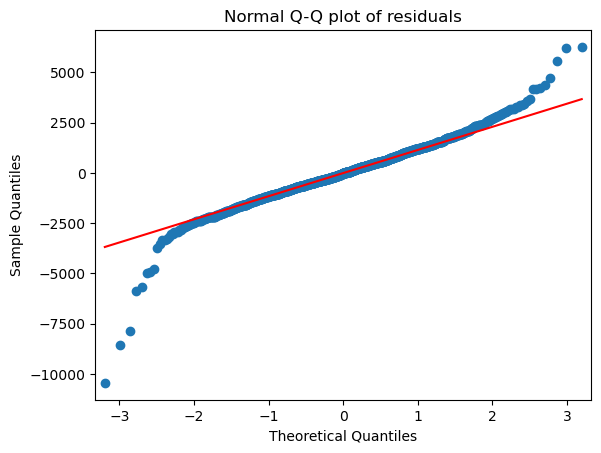

In [30]:
import statsmodels.api as sm
sm.qqplot(findcarpred['Error'],line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [35]:
from statsmodels.formula.api import ols

In [39]:
model = sm.OLS(y, x).fit()

In [40]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [41]:
myrows = np.arange(df1.shape[0])
myinfluence = np.round(c, 3) # y value

In [42]:
myrows

array([   0,    1,    2, ..., 1433, 1434, 1435])

In [43]:
myinfluence

array([0.008, 0.005, 0.006, ..., 0.   , 0.001, 0.007])

In [44]:
n = df.shape[0]
k = df.shape[1]
leverage_cutoff = 3*((k+1)/n)
print(leverage_cutoff)

0.08147632311977715


In [45]:
model_cooked = model.get_influence().cooks_distance[0]
n=df.shape[0]
critical_d = 4/n
print(n,critical_d)

1436 0.002785515320334262


In [46]:
print('Critical Cooks distance:', critical_d)
out_d = model_cooked>critical_d
out_d

Critical Cooks distance: 0.002785515320334262


array([ True,  True,  True, ..., False, False,  True])